# Szybka transformata Fouriera

### Źródła

Najlepszym źródłem, jakie znalazłem jest to: https://jakevdp.github.io/blog/2013/08/28/understanding-the-fft/
W fajny sposób tłumaczy dyskretną transformatę Fouriera i sposób, w jaki zmniejsza się jej złożoność z O(n^2) do O(n*log(n)). Na egzaminie wymagany jset przykład 8-punktowy -- opisany jest [tutaj](http://sip.cua.edu/res/docs/courses/ee515/chapter08/ch8-2.pdf), choć slajdy są tyleż brzydkie, co mało czytelne.  

Polska Wikipedia nie posiada fajnych artykułów o transformacie Fouriera (ani o DFT, ani o FFT). Angielska natomiast zawiera całkiem fajne informacje. Jak zawsze oczywiście Kincaid i Cheney jest dobrym źródłem informacji :)

### Transformata Fouriera

Ogólnie rzecz biorąc, transformata Fouriera przenosi funkcję z dziedziny czasu do dziedziny częstotliwości. Wzór wygląda tak:

<img src="images/fourier-transform.svg">

Jeśli nie jest oczywiste, co to oznacza, przetłumaczmy to na polski:
* "funkcja w dziedzinie czasu" to po prostu funkcja typu `f :: Czas -> Cokolwiek<zapewne liczba>`, czyli na przykład zmiana temperatury w ciągu dnia (każdemu momentowi możemy przyporządkować jakąś konkretną wartość). Wykres takiej funkcji mógłby wyglądać tak:

<img src="images/trends.png">

* "funkcja w dziedzinie częstotliwości" to, w pewnym uproszczeniu, funkcja, której podajemy jakąś częstotliwość, a ona mówi nam ile tej częstotliwości jest widoczne w funkcji, którą transformujemy. Wracając do przykładu z temperaturą: jeśli temperatura zmienia się w dobowych cyklach, to po transformacie Fouriera dowiemy się, że funkcja w domenie częstotliwości ma "peak" w okolicach częstotliwości 1/24h.

Transformata Fouriera ogólnie zasadza się na idei, że skomplikowaną, ale okresową funkcję możemy rozłożyć na sumę podstawowych funkcji trygonometrycznych. Wtedy faktycznie możemy łatwo odpowiedzieć sobie na pytanie jakie częstotliwości są najbardziej w takiej funkcji widoczne.

Podstawowe pytanie, jakie można by zadać: po co się to robi? Można to stosować na przykład:
* do analizy danych (żeby odpowiedzieć sobie na pytanie czy jakaś wartość zmienia się raczej z dnia na dzień, czy może z minuty na minutę -- wtedy dużo łatwiej stosować pozostałe metody statystyczne i analityczne)
* do cyfrowego przetwarzania sygnałów ("Gdybym mógł, to nawet na tym tekście bym zrobił FFT" -- kolega z inżynierii akustycznej)
* do kompresji
* wiele więcej

Drugie pytanie: skąd tam się bierze liczba Eulera we wszystkich wzorach?
Odpowiedź, raczej dla intuicji niż ścisła: bo robimy transformację ze "zwykłych" liczb na jakąś sumę funkcji trygonometrycznych, czyli dokładnie tak, jak we wzorze Eulera:
<img src="images/euler.png">


### Dyskretna transformacja Fouriera

W praktyce jednak nie mamy do czynienia z ciągłymi funkcjami (choćby dlatego, że na komputerze możemy reprezentować tylko skończoną ilość wartości). W takim razie operujemy raczej na ciągach `(czas, wartość)`. Powoduje to jednak, że  transformatę jest nieco łatwiej zrobić. Intuicyjnie: całkowanie to sumowanie, tylko bardzo "gęste". W takim razie Taki wzór, jak powyżej, możemy zamienić sobie na jakiś rodzaj (dyskretnego) sumowania. Tak się składa, że z pomocą przychodzą operacje na macierzach i wzór wyraża się dość prosto:

<img src="images/dft.png">

Tak naprawdę w tym wzorze nie ma żadnej magii (jeśli zna się ten na ciągłą transformatę) -- to po prostu to, co powyżej, tylko całkowanie zamienione jest na sumowanie. Na Wikipedii można nawet znaleźć [prosty przykład dla 4 elementów](https://en.wikipedia.org/wiki/Discrete_Fourier_transform#Example). Zerknijmy, jak to wygląda z perspektywy użytkownika:

#### Praktyczny przykład

Mamy dane o ruchu na stronie www, tzn. dla każdej minuty mamy liczbę odsłon strony w tej minucie. Wykres (fragment) wygląda tak:
<img src="images/timeseries.png">

Robimy dyskretną transformatę Fouriera takiego szeregu czasowego, żeby dowiedzieć się, jaka jest sezonowość danych. Poniższy wykres przedstawia udział poszczególnych częstotliwości w analizowanym szeregu:

In [1]:
import matplotlib.pyplot as plt # do wykresów
import numpy as np              # do macierzy
from scipy import fftpack       # do FFT

X = fftpack.fft(dataset)
f_s = 1  # godzinowo
freqs = fftpack.fftfreq(len(dataset)) * f_s # czętotliwości
fig, ax = plt.subplots()

ax.stem(freqs[:40], np.abs(X)[:40])
ax.set_xlabel('Frequency in hits/hour')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_ylim(-1, 200)
plt.show()

NameError: name 'dataset' is not defined

Ważny jest parametr `f_s`: mówi nam, jaka jest jednostka czasu -- wybraliśmy jedną godzinę, czyli częstotliwości będą podane z jednostką 1/h.
Nie mamy dostępnych danych, na których była prowadzona ta analiza, więc musimy zadowolić się rezultatem dołączonym statycznie:
<img src="images/fourier.png">

Dominującą częstotliwością jest 0.006/h (czyli mniej więcej raz na tydzień) -- oznacza to, że nasze dane mają wzorce powtarzające się z tygodniową częstotliwością.

### Szybka transformata Fouriera (FFT)

Ciężko o lepsze wyjaśnienie, niż w linku, który już przytaczaliśmy: https://jakevdp.github.io/blog/2013/08/28/understanding-the-fft/.

### Zadanie 1.

Napisz w dowolnym języku zwyczajną (wolną) dyskretną transformatę Fouriera.

### Zadanie 2.

Wykorzystaj implementację z zadania 1. do napisania szybkiej wersji transformaty (używając pomysłu z algorytmu Cooleya-Tukeya).

### Zadanie 3.

Przetestuj implementację z zadania 2. do wykonania analizy szeregu czasowego:
1. Znajdź dane przedstawiające jakiś szereg czasowy.
2. Załaduj je do programu (polecany: Python + Pandas, ale dowolna metoda jest okej, w tym języki R oraz Julia).
3. Zobacz, czy wykonanie analizy Fouriera na tych danych ma sens -- być może trzeba pogrupować je w równe odstępy (zob: funkcja [resample w pakiecie Pandas](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html)).
4. Narysuj wykres częstotliwości i postaraj się opisać jaka jest główna składowa.

### Pytanie otwarte

Czy transformata Fouriera może zostać wykorzystana do przewidywania szeregów czasowych:?

In [35]:
#zad1
def DFT_slow(N, x):
    """Compute the discrete Fourier Transform of the 1D array x"""
    x = np.asarray(x, dtype=float)
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

In [36]:
x = np.random.random(1024)
np.allclose(DFT_slow(x.shape[0],x), np.fft.fft(x))

True

In [37]:
%timeit DFT_slow(x.shape[0],x)
%timeit np.fft.fft(x)

114 ms ± 3.02 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
4.67 µs ± 47.2 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [38]:
#zad2
def FFT(N, x):
    """A recursive implementation of the 1D Cooley-Tukey FFT"""
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    
    if N % 2 > 0:
        return DFT_slow(N,x)
    elif N <= 32:  # this cutoff should be optimized
        return DFT_slow(N,x)
    else:
        X_even = FFT(x[::2].shape[0], x[::2])
        X_odd = FFT(x[1::2].shape[0], x[1::2])
        factor = np.exp(-2j * np.pi * np.arange(N) / N)
        return np.concatenate([X_even + factor[:int(N / 2)] * X_odd,
                               X_even + factor[int(N / 2):] * X_odd])

In [8]:
def FFT_vectorized(x):
    """A vectorized, non-recursive version of the Cooley-Tukey FFT"""
    x = np.asarray(x, dtype=float)
    N = x.shape[0]

    if np.log2(N) % 1 > 0:
            raise ValueError("size of x must be a power of 2")

    # N_min here is equivalent to the stopping condition above,
    # and should be a power of 2
    N_min = min(N, 32)
    
    # Perform an O[N^2] DFT on all length-N_min sub-problems at once
    n = np.arange(N_min)
    k = n[:, None]
    M = np.exp(-2j * np.pi * n * k / N_min)
    X = np.dot(M, x.reshape((N_min, -1)))

    # build-up each level of the recursive calculation all at once
    while X.shape[0] < N:
        X_even = X[:, :int(X.shape[1] / 2)]
        X_odd = X[:, int(X.shape[1] / 2):]
        factor = np.exp(-1j * np.pi * np.arange(X.shape[0])
                        / X.shape[0])[:, None]
        X = np.vstack([X_even + factor * X_odd,
                       X_even - factor * X_odd])

    return X.ravel()

In [29]:
x = np.random.random(1024)
np.allclose(FFT(x.shape[0], x), np.fft.fft(x))

True

In [30]:
%timeit FFT(x.shape[0],x)
%timeit FFT_vectorized(x)
%timeit np.fft.fft(x)

3.96 ms ± 49.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
352 µs ± 13.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
4.75 µs ± 84.4 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [31]:
def get_fourier_transformation_input():
    split_line = input().split()
    n = get_value(split_line[0])
    row = [get_value(x) for x in split_line[1:]]
    while len(row) < n:
        for string in input().split():
            row.append(get_value(string))
    return n, row[:n]

In [32]:
def get_value(string):
    if type(string) == int or type(string) == float:
        return string
    try:
        return float(string) if '.' in str(string) else int(string)
    except:
        return string


In [33]:
def print_fft_plot(n, fft_result):
    f_s = 1
    freqs = fftpack.fftfreq(n) * f_s
    pos_freqs = [fr for fr in freqs if fr >= 0]
    fig, ax = plt.subplots()

    ax.stem(pos_freqs, np.abs(fft_result[:len(pos_freqs)]))
    ax.set_xlabel('Frequency in edits/year')
    ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
    ax.set_ylim(-1, 3000)
plt.show()

11
1023 307 322 356 573 299 346 449 655 474 324 45


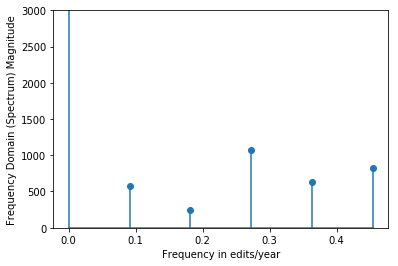

In [39]:
n, x = get_fourier_transformation_input()
fft_result = FFT(n, x)
print_fft_plot(n, fft_result)